# Load data

In [1]:
import pandas as pd
from siml_data import Featureset

In [2]:
feature_loader = Featureset()

In [3]:
df = feature_loader.get()

## Check for NaN values

In [4]:
df.isna().sum().sum()

0

## Remove all channels except Close price

In [5]:
[x for x in df.columns if 'btc' in x.lower()]

['btcusd_dOpen', 'btcusd_dHigh', 'btcusd_dLow', 'btcusd_dClose']

In [6]:
df = df.drop(columns=[c for c in df.columns if 'Close' not in c])

## Check correlation

<Axes: >

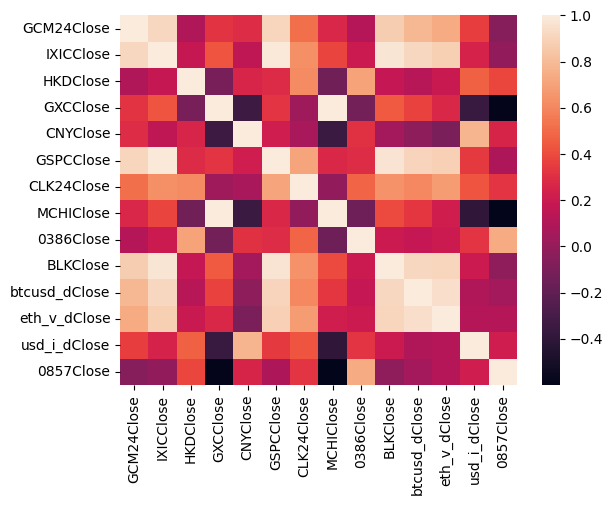

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr())

In [8]:
df.corr()['btcusd_dClose'].abs().sort_values(ascending=False).head(10)

btcusd_dClose    1.000000
eth_v_dClose     0.945606
IXICClose        0.916503
BLKClose         0.912576
GSPCClose        0.902721
GCM24Close       0.786737
CLK24Close       0.605982
GXCClose         0.372193
MCHIClose        0.327378
0386Close        0.173504
Name: btcusd_dClose, dtype: float64

## Preprocess data

In [9]:
from siml_pipeline import Pipeline

In [10]:
p = Pipeline()
X_train, X_test, Y_train, Y_test = p.process(df, 'btcusd_dClose')

In [11]:
X_train.shape[-1], X_test.shape, Y_train.shape, Y_test.shape

(13, (407, 10, 13), (1240, 1), (407, 1))

# Train model

In [12]:
from siml_model import build_model

In [13]:
model = build_model(p.num_days, X_train.shape[-1])

2024-05-09 22:36:08.129387: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 22:36:08.130560: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [15]:
epochs = 6
batch = 256

history = model.fit(X_train,
                    Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=epochs,
                    batch_size=batch)

2024-05-09 22:36:09.551141: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/6
5/5 [==============================] - 6s 257ms/step - loss: 0.9921 - mse: 0.9921 - val_loss: 1.8101 - val_mse: 1.8101
Epoch 2/6
5/5 [==============================] - 1s 102ms/step - loss: 0.8435 - mse: 0.8435 - val_loss: 1.8286 - val_mse: 1.8286
Epoch 3/6
5/5 [==============================] - 0s 98ms/step - loss: 0.6120 - mse: 0.6120 - val_loss: 1.8313 - val_mse: 1.8313
Epoch 4/6
5/5 [==============================] - 0s 96ms/step - loss: 0.3898 - mse: 0.3898 - val_loss: 1.8280 - val_mse: 1.8280
Epoch 5/6
5/5 [==============================] - 0s 102ms/step - loss: 0.3166 - mse: 0.3166 - val_loss: 1.8187 - val_mse: 1.8187
Epoch 6/6
5/5 [==============================] - 0s 101ms/step - loss: 0.2832 - mse: 0.2832 - val_loss: 1.7893 - val_mse: 1.7893


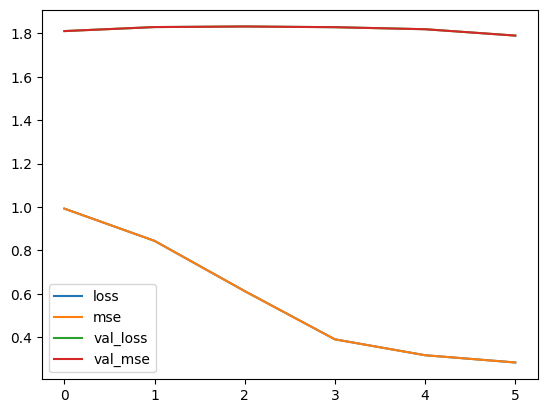

In [16]:
for k,v in history.history.items():
    plt.plot(v, label=k)
plt.legend()